In [4]:
import dataParsing

text_parser = dataParsing.text_parser

Read the data using the dataParsing modules, to get a dictionary with the word:Counter pairs. The data is not on the repository due to copyright reasons. 

Data source: https://www1.dict.cc/translation_file_request.php?l=e

In [5]:
text_parser.empty_dictionary()


with open("data.txt", "r", encoding="utf-8") as r:
    for line in r:
        text_parser.parse(line)

dict = text_parser.dictionary

KeyboardInterrupt: 

In [7]:
import pandas as pd

dataset = pd.DataFrame.from_dict(data, orient='index')

dataset.reset_index(inplace=True)

dataset = dataset.rename(columns = {'index': "word", 0: "gender"})

dataset.tail(10)

,word,n,f,m
376786,Verkehrsraum,NaN,NaN,1.0
376787,Verkehrsunternehmer,NaN,NaN,1.0
376788,Hauptverkehrszug,NaN,NaN,1.0
376789,Doppellumentubus,NaN,NaN,1.0
376790,Kombinationstubus,NaN,NaN,1.0
376791,Autoabstellplatz,NaN,NaN,1.0
376792,Plasmalichtbogen,NaN,NaN,1.0
376793,Flugzustand,NaN,NaN,1.0
376794,Löschungsort,NaN,NaN,1.0
376795,Cejkait,NaN,NaN,1.0


In [13]:
def load_dataset():
    dataset = pd.read_csv("dataset.csv")
    return dataset


dataset = load_dataset()
dataset.dropna(inplace=True)
dataset

,word,gender
0,Keratin,n
1,Lactalbumin,n
2,Mercaptoethanol,n
3,Nduja,f
4,Vesta,f
...,...,...
376791,Nachrede,f
376792,Löschungsort,m
376793,Cejkait,m
376794,Propellerdomäne,f


Total number of words: 376795
Percentage of feminine nouns: 44.25%
Percentage of masculine nouns: 34.38%
Percentage of neutral nouns: 21.37%
Longest word: Grundstücksverkehrsgenehmigungszuständigkeitsübertragungsverordnung (67 letters)


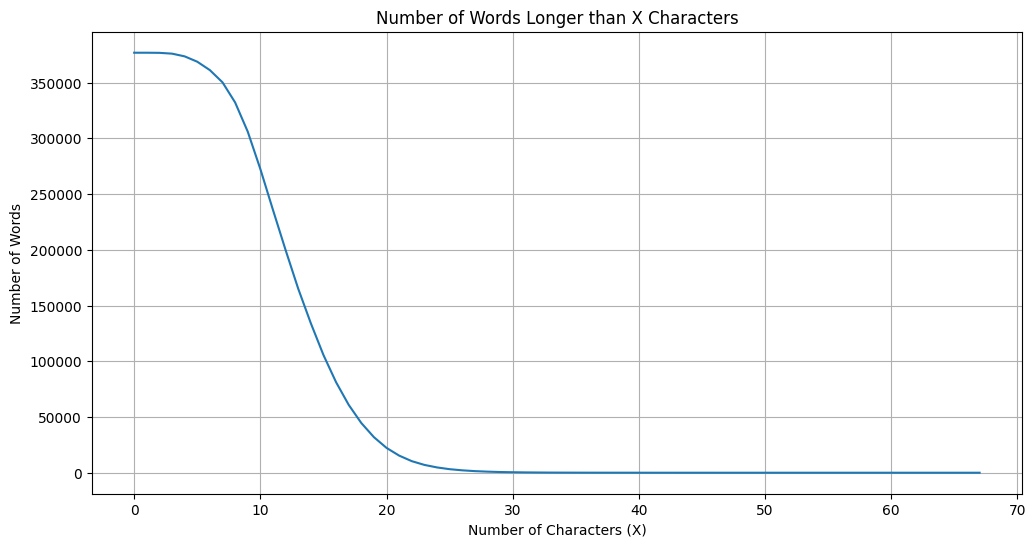

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dataset' is already loaded
data_f = dataset[dataset['gender'] == "f"]
data_m = dataset[dataset['gender'] == "m"]
data_n = dataset[dataset['gender'] == "n"]
longest_word = max(dataset['word'], key=len)
possible_characters = "abcdefghijklmnopqrstuvwxyzäöüß"

# Calculate word length distribution
max_length = len(longest_word)
word_lengths = [len(word) for word in dataset['word']]
length_counts = [sum(length > x for length in word_lengths) for x in range(max_length + 1)]



# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(range(max_length + 1), length_counts)
plt.title("Number of Words Longer than X Characters")
plt.xlabel("Number of Characters (X)")
plt.ylabel("Number of Words")
plt.grid(True)

# Print statistics
print("Total number of words:", len(dataset))
print(f"Percentage of feminine nouns: {len(data_f)/len(dataset)*100:.2f}%")
print(f"Percentage of masculine nouns: {len(data_m)/len(dataset)*100:.2f}%")
print(f"Percentage of neutral nouns: {len(data_n)/len(dataset)*100:.2f}%")
print(f"Longest word: {longest_word} ({len(longest_word)} letters)")

# Show the plot
plt.show()

In [ ]:
#save dataset as csv

def save_dataset():
    dataset.to_csv("dataset.csv", index=False)

save_dataset()
    